In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import numpy.testing as npt
import nibabel as nib
import dipy.reconst.sfm as sfm
import dipy.data as dpd
import dipy.core.gradients as grad
import dipy.sims.voxel as sims
import dipy.core.optimize as opt

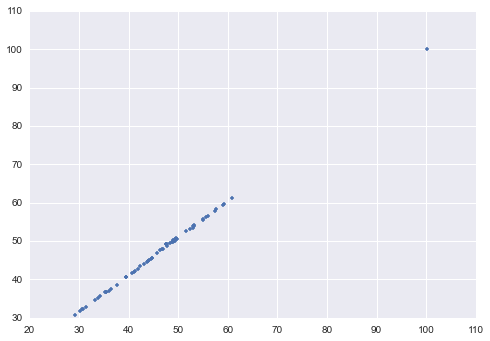

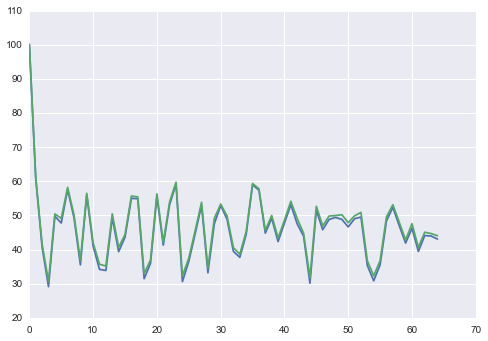

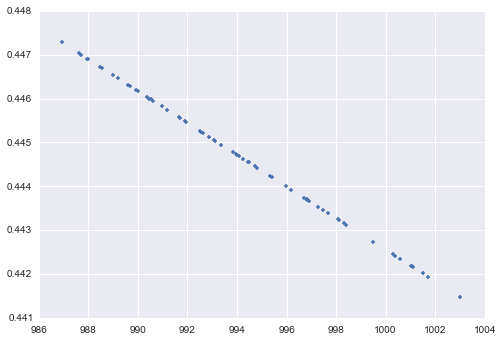

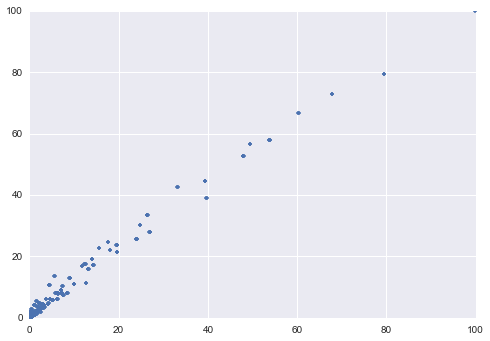

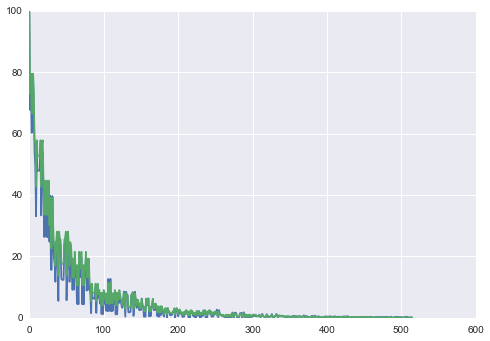

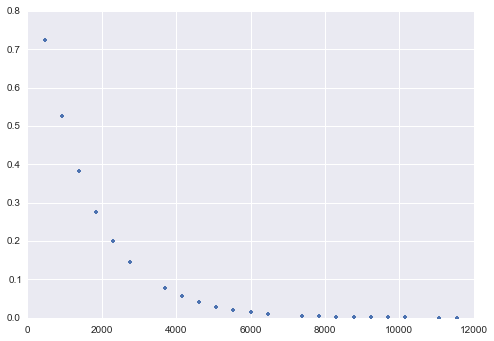

In [6]:
fdata, fbvals, fbvecs = dpd.get_data()
data_dti = nib.load(fdata).get_data()
gtab_dti = grad.gradient_table(fbvals, fbvecs)
data_multi, gtab_multi = dpd.dsi_deconv_voxels()

for data, gtab in zip([data_dti, data_multi], [gtab_dti, gtab_multi]):
    sfmodel = sfm.SparseFascicleModel(
              gtab, isotropic=sfm.ExponentialIsotropicModel,
              solver='NN')

    sffit1 = sfmodel.fit(data[0, 0, 0])
    sphere = dpd.get_sphere()
    odf1 = sffit1.odf(sphere)
    pred1 = sffit1.predict(gtab)

    SNR = 1000
    S0 = 100
    mevals = np.array(([0.0015, 0.0005, 0.0005],
                       [0.0015, 0.0005, 0.0005]))
    angles = [(0, 0), (60, 0)]
    S, sticks = sims.multi_tensor(gtab, mevals, S0, angles=angles,
                                  fractions=[50, 50], snr=SNR)
    sffit = sfmodel.fit(S)
    pred = sffit.predict()
    plt.figure()
    plt.plot(S, pred, '.')
    plt.figure()
    plt.plot(S)
    plt.plot(pred)
    plt.figure()
    plt.plot(gtab.bvals[~gtab.b0s_mask], sffit.iso, '.')
    